In [2]:
from bs4 import BeautifulSoup
import requests
import re
import time

def scraper(url):
    page = requests.get(url)
    return page.text

def extract_match_info(url, id):
    def has_exact_classes(tag):
        return tag.name == 'div' and sorted(tag.get('class', [])) == ['cb-col', 'cb-col-73', 'cb-mat-fct-itm']

    pattern = r"/(\w+)-vs-(\w+)-"
    reg = re.search(pattern, url)
    team1 = reg.group(1)
    team2 = reg.group(2)

    match_info = {team1:[], team2:[]}

    html = scraper(url)
    soup = BeautifulSoup(html, 'html.parser')
    data = soup.find_all(has_exact_classes)

    for i in range(len(data)):
        if len(data[i].find_all()) == 11:
            players1 = data[i].find_all(class_='text-hvr-underline')
            for player in players1:
                match_info[team1].append(player.text.replace(' (wk)', '').replace(' (c)', '').replace(' (c & wk)', ''))

            players2 = data[i+3].find_all(class_='text-hvr-underline')
            for player in players2:
                match_info[team2].append(player.text.replace(' (wk)', '').replace(' (c)', '').replace(' (c & wk)', ''))
            break
    
    print(f'match {id} - {team1} vs {team2} done')
    return match_info

def parser():
    html = scraper('https://www.cricbuzz.com/cricket-series/5945/indian-premier-league-2023/matches')

    soup = BeautifulSoup(html, 'html.parser')
    matches = soup.find_all(class_='text-hvr-underline')
    site = 'https://www.cricbuzz.com'

    match_urls= []
    for match in matches:
        if 'cricket-scores' in match.get('href'):
            match_urls.append(match.get('href').replace('cricket-scores', 'cricket-match-facts'))

    match_data, id = [], 1
    for url in match_urls:
        match_data.append(extract_match_info(f'{site}{url}', id))
        id += 1
        time.sleep(2)

    return match_data

match_data = parser()
print(match_data)

match 1 - gt vs csk done
match 2 - pbks vs kkr done
match 3 - lsg vs dc done
match 4 - srh vs rr done
match 5 - rcb vs mi done
match 6 - csk vs lsg done
match 7 - dc vs gt done
match 8 - rr vs pbks done
match 9 - kkr vs rcb done
match 10 - lsg vs srh done
match 11 - rr vs dc done
match 12 - mi vs csk done
match 13 - gt vs kkr done
match 14 - srh vs pbks done
match 15 - rcb vs lsg done
match 16 - dc vs mi done
match 17 - csk vs rr done
match 18 - pbks vs gt done
match 19 - kkr vs srh done
match 20 - rcb vs dc done
match 21 - lsg vs pbks done
match 22 - mi vs kkr done
match 23 - gt vs rr done
match 24 - rcb vs csk done
match 25 - srh vs mi done
match 26 - rr vs lsg done
match 27 - pbks vs rcb done
match 28 - dc vs kkr done
match 29 - csk vs srh done
match 30 - lsg vs gt done
match 31 - mi vs pbks done
match 32 - rcb vs rr done
match 33 - kkr vs csk done
match 34 - srh vs dc done
match 35 - gt vs mi done
match 36 - rcb vs kkr done
match 37 - rr vs csk done
match 38 - pbks vs lsg done
matc

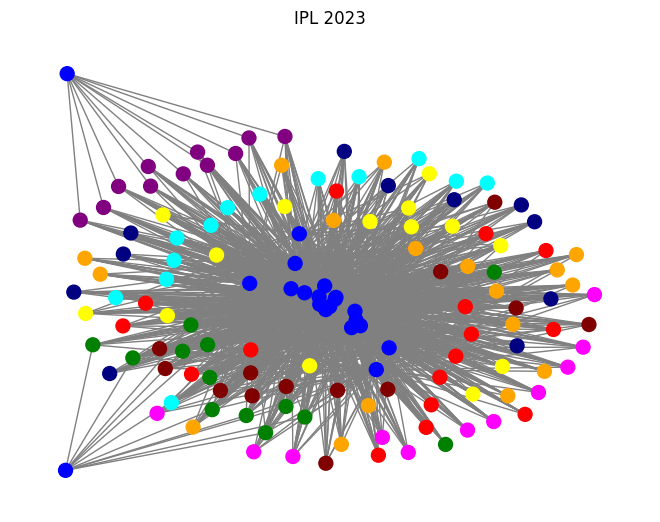

Community 1: frozenset({'Dwaine Pretorius', 'Shahrukh Khan', 'Shimron Hetmyer', 'Jofra Archer', 'Michael Bracewell', 'Shivam Dube', 'Ajinkya Rahane', 'Rishi Dhawan', 'Trent Boult', 'Devdutt Padikkal', 'Devon Conway', 'Tilak Varma', 'Arshad Khan', 'Sisanda Magala', 'Shahbaz Ahmed', 'MS Dhoni', 'Yuzvendra Chahal', 'Matthew Short', 'Shikhar Dhawan', 'Dinesh Karthik', 'Sandeep Sharma', 'Jason Holder', 'Faf du Plessis', 'Kumar Kartikeya', 'Mohammed Siraj', 'Akash Deep', 'Matheesha Pathirana', 'Ruturaj Gaikwad', 'Ravindra Jadeja', 'Mitchell Santner', 'Rohit Sharma', 'Jitesh Sharma', 'Arshdeep Singh', 'Virat Kohli', 'Reece Topley', 'Maheesh Theekshana', 'Tristan Stubbs', 'Tim David', 'Sanju Samson', 'Deepak Chahar', 'Sam Curran', 'Karn Sharma', 'Tushar Deshpande', 'Prabhsimran Singh', 'Harpreet Brar', 'Glenn Maxwell', 'Akash Madhwal', 'Dhruv Jurel', 'Rahul Chahar', 'Liam Livingstone', 'Ravichandran Ashwin', 'Harshal Patel', 'Moeen Ali', 'Yashasvi Jaiswal', 'Jos Buttler'})
Community 2: frozens

In [43]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

team_colors = {
    "rcb": "red",
    "mi": "blue",
    "gt": "green",
    "csk": "yellow",
    "kkr": "purple",
    "srh": "orange",
    "lsg": "cyan",
    "rr": "magenta",
    "pbks": "maroon",
    "dc": "navy"

}

G = nx.Graph()

for match in match_data:
    keys = list(match.keys())

    if keys[0] == 'mi' or keys[1] == 'mi':
        values = list(match.values())

        team1_players = values[0]
        team2_players = values[1]
        
        for player in team1_players:
            G.add_node(player, color=team_colors[keys[0]])
        
        for player in team2_players:
            G.add_node(player, color=team_colors[keys[1]])
        
        for player1 in team1_players:
            for player2 in team2_players:
                G.add_edge(player1, player2)


communities = community.greedy_modularity_communities(G)

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=False, node_color=[G.nodes[node]['color'] for node in G.nodes()], node_size=100, edge_color='gray',)


plt.title("IPL 2023")
plt.show()

for i, comm in enumerate(communities):
    print(f"Community {i+1}: {comm}")

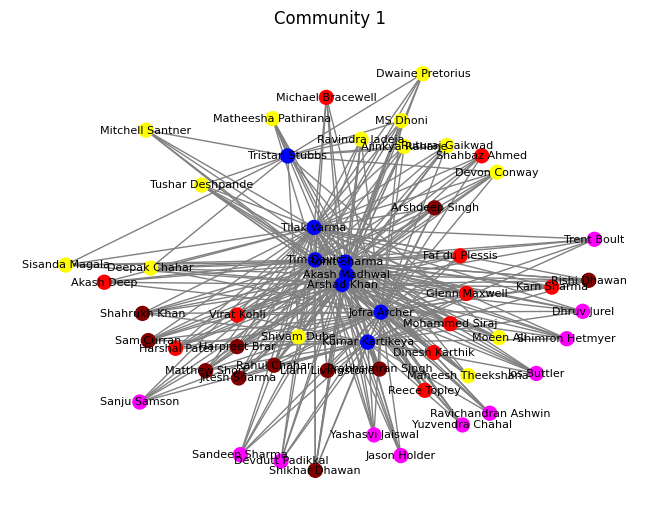

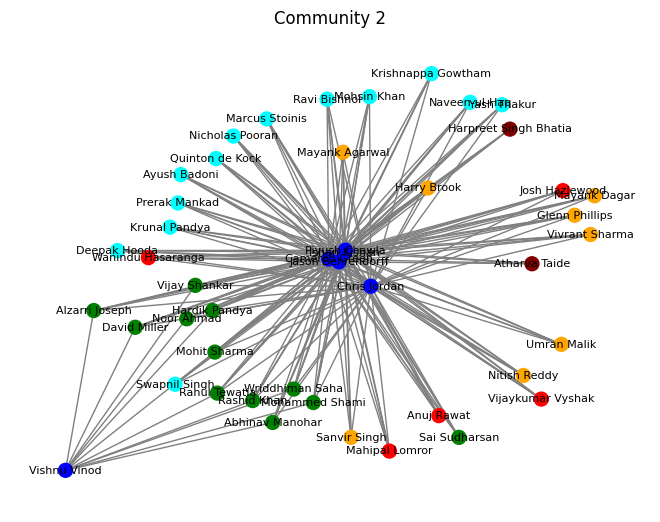

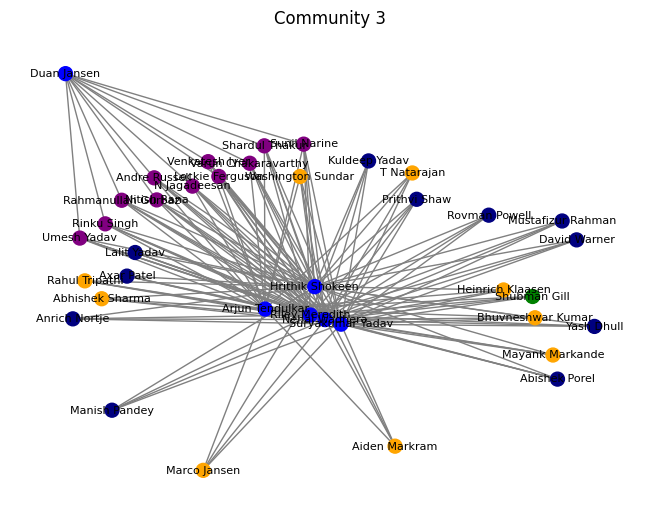

In [48]:
for i, comm in enumerate(communities):
    subgraph = G.subgraph(comm)
    
    nx.draw(subgraph, pos, with_labels=True, node_color=[subgraph.nodes[node]['color'] for node in subgraph.nodes()], node_size=100, edge_color='gray', font_size=8)
    
    plt.title(f"Community {i+1}")
    plt.show()

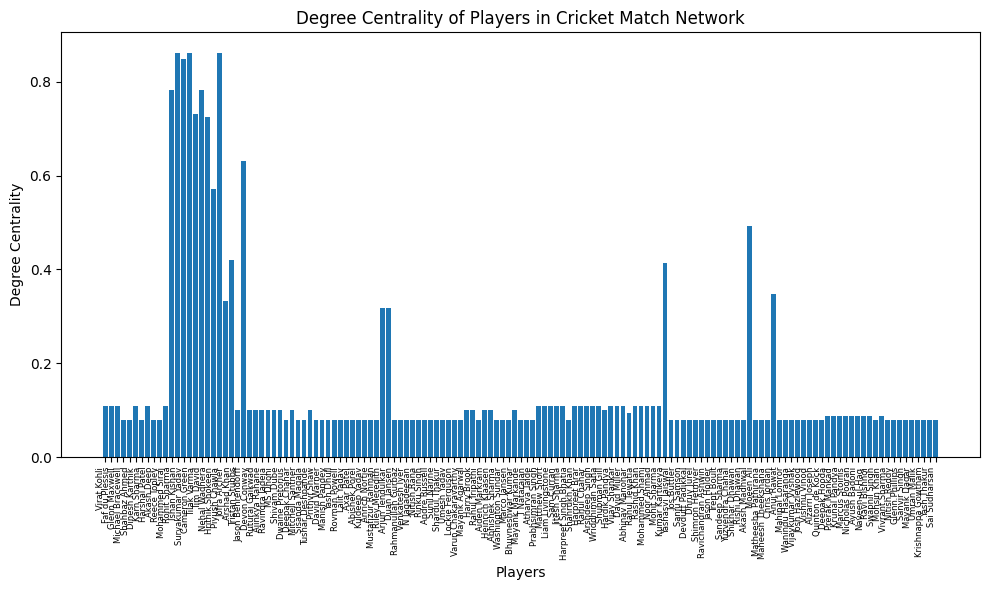

In [54]:
degree_centrality = nx.degree_centrality(G)

# Plot degree centrality
plt.figure(figsize=(10, 6))
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.xlabel('Players')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Players in Cricket Match Network')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.tight_layout()
plt.show()